# Pytorch 기초

## 텐서 다루기

### 텐서 생성 및 변환

In [1]:
import torch
print(torch.tensor([[1, 2], [3, 4]])) # 2차원 형태의 텐서
# print(torch.tensor([[1, 2], [3, 4]], device='cuda:0')) # GPU에 텐서 생성
print(torch.tensor([[1, 2], [3, 4]], dtype=torch.float64)) # dtype을 이용해 텐서 생성

tensor([[1, 2],
        [3, 4]])
tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)


In [2]:
temp = torch.tensor([[1, 2], [3, 4]])
print(temp.numpy()) # 텐서를 ndarray로 변환

# temp = torch.tensor([[1, 2], [3, 4]], device='cuda:0')
# print(temp.numpy()) # GPU 상의 텐서를 CPU의 텐서로 변환 후 ndarray로 변환

[[1 2]
 [3 4]]


### 텐서의 인덱스 조작

- ndarray를 조작하는 것과 유사하게 동작
- 배열처럼 인덱스를 바로 지정하거나 슬라이스 등을 사용할 수 있다.

In [3]:
temp = torch.FloatTensor([1, 2, 3, 4, 5, 6, 7]) # 1차원 벡터
print(temp[0], temp[1], temp[2]) # 인덱스 접근
print('-----------------------')
print(temp[2:5], temp[4:-1]) # 슬라이스 접근

tensor(1.) tensor(2.) tensor(3.)
-----------------------
tensor([3., 4., 5.]) tensor([5., 6.])


### 텐서 연산 및 차원 조작

- 텐서 간의 타입이 다르면 연산이 불가능

In [4]:
v = torch.tensor([1, 2, 3])
w = torch.tensor([3, 4, 6])
print(w-v) # 같은 길이의 벡터간 뺄셈 연산

tensor([2, 2, 3])


In [5]:
temp = torch.tensor([
    [1, 2], [3, 4]
])

print(temp.shape)
print('-----------------')
print(temp.view(4, 1)) # 2 * 2 행렬을 4 * 1로 변형
print('-----------------')
print(temp.view(-1)) # 1차원 벡터로 변형
print('-----------------')
print(temp.view(1, -1)) # (1, 4) 형태로 변형
print('-----------------')
print(temp.view(-1, 1)) # (4, 1) 형태로 변형

torch.Size([2, 2])
-----------------
tensor([[1],
        [2],
        [3],
        [4]])
-----------------
tensor([1, 2, 3, 4])
-----------------
tensor([[1, 2, 3, 4]])
-----------------
tensor([[1],
        [2],
        [3],
        [4]])


## 파이토치 맛보기

In [60]:
# 라이브러리 호출
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
dataset = pd.read_csv('data/chap02/data/car_evaluation.csv')
dataset.head()

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


- price: 자동차 가격
- maint: 자동차 유지비용
- doors: 자동차 문 개수
- persons: 수용 인원
- lug_capacity: 수하물 용량
- safety: 안정성
- output: 차 상태. unacc(허용 불가능한 수준), acc(허용 가능한 수준), good(양호), vgood(매우 좋음)

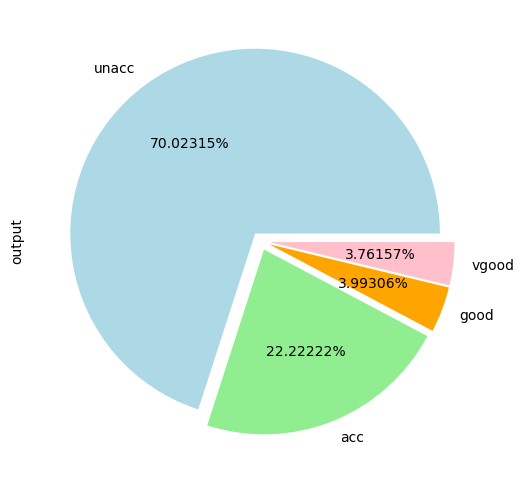

In [62]:
# 분포 확인(시각화)
plt.figure(figsize=[8, 6])
dataset.output.value_counts().plot(kind='pie', autopct='%0.05f%%',
                                   colors=['lightblue', 'lightgreen', 'orange', 'pink'], explode=(0.05, 0.05, 0.05, 0.05))
plt.show()

- 대부분 허용 불가능(70%)

In [63]:
# 범주형 타입으로 데이터 변환
categorical_columns = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety']

for category in categorical_columns:
    dataset[category] = dataset[category].astype('category')

price = dataset['price'].cat.codes.values
maint = dataset['maint'].cat.codes.values
doors = dataset['doors'].cat.codes.values
persons = dataset['persons'].cat.codes.values
lug_capacity = dataset['lug_capacity'].cat.codes.values
safety = dataset['safety'].cat.codes.values

categorical_data = np.stack([price, maint, doors, persons, lug_capacity, safety], 1)
categorical_data[:10]

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       [3, 3, 0, 0, 1, 1],
       [3, 3, 0, 0, 1, 2],
       [3, 3, 0, 0, 1, 0],
       [3, 3, 0, 0, 0, 1],
       [3, 3, 0, 0, 0, 2],
       [3, 3, 0, 0, 0, 0],
       [3, 3, 0, 1, 2, 1]], dtype=int8)

In [64]:
# 배열을 텐서로 변환
categorical_data = torch.tensor(categorical_data, dtype=torch.int64)
categorical_data[:10]

tensor([[3, 3, 0, 0, 2, 1],
        [3, 3, 0, 0, 2, 2],
        [3, 3, 0, 0, 2, 0],
        [3, 3, 0, 0, 1, 1],
        [3, 3, 0, 0, 1, 2],
        [3, 3, 0, 0, 1, 0],
        [3, 3, 0, 0, 0, 1],
        [3, 3, 0, 0, 0, 2],
        [3, 3, 0, 0, 0, 0],
        [3, 3, 0, 1, 2, 1]])

In [65]:
# 레이블 데이터 텐서 변환
# 책에서는 get_dummies로 변환하나, 해당 방법은 레이블이 정확하게 매칭되지 않는 것 같아 수정
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
outputs = le.fit_transform(dataset.output)
outputs = torch.tensor(outputs).flatten() # 1차원 텐서로 변환

print(categorical_data.shape)
print(outputs.shape)

torch.Size([1728, 6])
torch.Size([1728])


In [68]:
# 범주형 컬럼을 N차원으로 변환
categorical_column_sizes = [len(dataset[column].cat.categories) for column in categorical_columns]
categorical_embedding_sizes = [(col_size, min(50, (col_size + 1)//2)) for col_size in categorical_column_sizes]
print(categorical_embedding_sizes)

[(4, 2), (4, 2), (4, 2), (3, 2), (3, 2), (3, 2)]


In [69]:
# 데이터셋 분리
total_records = 1728
test_records = int(total_records * .2)

categorical_train_data = categorical_data[:total_records-test_records]
categorical_test_data = categorical_data[total_records-test_records:total_records]
train_outputs = outputs[:total_records-test_records]
test_outputs = outputs[total_records-test_records:total_records]

print(len(categorical_train_data), len(categorical_test_data), len(train_outputs), len(test_outputs))

1383 345 1383 345


In [76]:
# 모델 네트워크 생성
class Model(nn.Module): # 클래스 형태로 구현되는 모델은 nn.Moduls을 상속받음
    def __init__(self, embedding_size, output_size, layers, p=0.4): # 모델에서 사용될 파라미터와 신경망을 초기화하기 위한 용도로 사용. 객체가 생성될 때 자동으로 호출
        super().__init__()  # 부모 클래스에 접근할 때 사용. super는 self를 사용하지 않는 것에 주의
        self.all_embeddings = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in embedding_size])
        self.embedding_droupout = nn.Dropout(p)
        
        all_layers = []
        num_categorical_cols = sum((nf for ni, nf in embedding_size))
        input_size = num_categorical_cols
        
        for i in layers:    # 네트워크 계층을 구축하기 위해 for문을 이용해 각 계층을 all_layers 목록에 추가
            all_layers.append(nn.Linear(input_size, i))
            all_layers.append(nn.ReLU(inplace=True))
            all_layers.append(nn.BatchNorm1d(i))
            all_layers.append(nn.Dropout(p))
            input_size=i
        
        all_layers.append(nn.Linear(layers[-1], output_size))
        self.layers = nn.Sequential(*all_layers)
    
    def forward(self, x_categorical):   # 연산 진행
        embeddings = []
        for i, e in enumerate(self.all_embeddings):
            embeddings.append(e(x_categorical[:, i]))
        x = torch.cat(embeddings, 1)
        x = self.embedding_droupout(x)
        x = self.layers(x)
        return x

In [77]:
model = Model(categorical_embedding_sizes, 4, [200, 100, 50], p=0.4)
print(model)

Model(
  (all_embeddings): ModuleList(
    (0-2): 3 x Embedding(4, 2)
    (3-5): 3 x Embedding(3, 2)
  )
  (embedding_droupout): Dropout(p=0.4, inplace=False)
  (layers): Sequential(
    (0): Linear(in_features=12, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=50, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=50, out_features=4, bias=True)
  )
)


In [78]:
# 모델의 파라미터 정의
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [79]:
# cpu/gpu 사용 지정
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

In [80]:
# 모델 학습
epochs = 500
aggregated_losses = []
train_outputs = train_outputs.to(device=device, dtype=torch.int64)
for i in range(epochs):
    i += 1
    y_pred = model(categorical_train_data).to(device)
    single_loss = loss_function(y_pred, train_outputs)
    aggregated_losses.append(single_loss)

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

    optimizer.zero_grad()
    single_loss.backward()
    optimizer.step()

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

epoch:   1 loss: 1.63970459
epoch:  26 loss: 1.30702281
epoch:  51 loss: 1.15560603
epoch:  76 loss: 1.04527044
epoch: 101 loss: 0.88720834
epoch: 126 loss: 0.76698482
epoch: 151 loss: 0.66981870
epoch: 176 loss: 0.61258328
epoch: 201 loss: 0.56811047
epoch: 226 loss: 0.55067605
epoch: 251 loss: 0.53980565
epoch: 276 loss: 0.48288924
epoch: 301 loss: 0.49072149
epoch: 326 loss: 0.47900930
epoch: 351 loss: 0.47934598
epoch: 376 loss: 0.44938058
epoch: 401 loss: 0.42221999
epoch: 426 loss: 0.42903435
epoch: 451 loss: 0.42830047
epoch: 476 loss: 0.41064671
epoch: 500 loss: 0.4125223756


In [81]:
# test 데이터셋으로 예측 진행
test_outputs = test_outputs.to(device=device, dtype=torch.int64)
with torch.no_grad():
    y_val = model(categorical_test_data)
    loss = loss_function(y_val, test_outputs)
print(f'loss: {loss:.8f}')

loss: 1.16057611


In [82]:
# 모델 예측 확인
print(y_val[:5])

tensor([[-1.9960, -1.9771,  5.3925, -1.7750],
        [-2.4749, -2.1952,  4.2897, -2.1560],
        [-0.2885, -1.6856,  2.0017, -1.3010],
        [-1.8156, -2.4526,  3.5709, -2.2266],
        [-0.0614, -2.1246,  4.4816, -2.1513]])


In [83]:
# 가장 큰 값을 갖는 인덱스 확인
y_val = np.argmax(y_val, axis=1)
print(y_val[:5])

tensor([2, 2, 2, 2, 2])


In [84]:
# test 데이터셋을 이용한 정확도 확인
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(test_outputs, y_val))
print(classification_report(test_outputs, y_val))
print(accuracy_score(test_outputs, y_val))

[[ 24   0  39   0]
 [ 28   1  17   0]
 [  9   0 188   0]
 [ 31   0   8   0]]
              precision    recall  f1-score   support

           0       0.26      0.38      0.31        63
           1       1.00      0.02      0.04        46
           2       0.75      0.95      0.84       197
           3       0.00      0.00      0.00        39

    accuracy                           0.62       345
   macro avg       0.50      0.34      0.30       345
weighted avg       0.61      0.62      0.54       345

0.6173913043478261


d:\anaconda3\envs\mybase\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda3\envs\mybase\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda3\envs\mybase\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
